# Familiarize the basic features of Qiskit

## Introduction

This notebook constitutes some introductory information with relavant examples on getting started with [Qiskit](https://qiskit.org/), an open-source software for quantum computation. A more complete overview of the available features can be found from the [Qiskit documentation](https://qiskit.org/documentation/tutorials.html) as well as [Qiskit textbook](https://qiskit.org/textbook/preface.html).

## Step 0: Download the software & import packages.

[Here is a hands-on tutorial](https://www.youtube.com/watch?v=1kRfHNUbkrg&t=163s) to install Qiskit. The first step is to create an IBM ID account. Then you will be able to use Qiskit on the cloud through the IBM Quantum Lab on your dashboard. To get started locally with Qiskit, we will use the Anaconda distribution of Python. The tutorial explains how to download Qiskit and store the account information locally.

In [1]:
# Import the relevant packages.
from qiskit import * 
%matplotlib inline             
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

## Step 1: Construct your quantum circuit.

A [quantum circuit](https://wiki2.org/en/Quantum_circuit) is a computational routine which incorporates classical computations into coherent quantum operations on quantum data. The [Qiskit circuit library](https://qiskit.org/documentation/apidoc/circuit_library.html) shows us the syntax to program a quantum circuit and add quantum operations to the qubits of interest. To get started, we will introduce the class [QuantumCircuit](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.html), in which we will define the circuit and explore the available built-in methods.

### 1.1 Define the quantum circuit.

In [2]:
from qiskit import QuantumCircuit  # You can ignore this if 'from qiskit import *' has been executed.

Here're 2 ways we can define a quantum circuit, with 3 qubits and 3 classical bits:

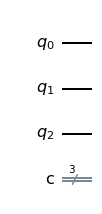

In [3]:
# Method 1: 
qc_1p1a = QuantumCircuit(3,3)  
qc_1p1a.draw('mpl')

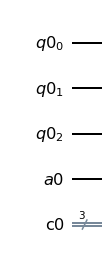

In [4]:
# Method 2: 
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
ar = AncillaRegister(1)  # You can add ancilla qubit if it's needed, otherwise no need to include 'ar' in the line below.
qc_1p1b = QuantumCircuit(qr, ar, cr)
qc_1p1b.draw('mpl')

### 1.2 Combine 2 (or multiple) quantum circuits.

$\bullet$ **Method 1:** If two circuits `circ_1` and `circ_2` have the same number of qubits and classical bits, then their combination could just be implemented like adding two numbers `circ = circ_1 + circ_2`. A more flexible method [QuantumCircuit.compose](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.compose.html#qiskit.circuit.QuantumCircuit.compose) is developed, which we can combine any two circuits and specify the qubits to compose onto. [This video](https://www.youtube.com/watch?v=3ja8uCqUS0s) shows an example to implement these features. Here's another example:

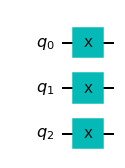

In [5]:
circ_1p2a = QuantumCircuit(3)
circ_1p2a.x([0,1,2])
circ_1p2a.draw('mpl')

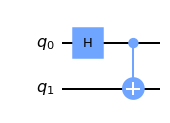

In [6]:
circ_1p2b = QuantumCircuit(2)
circ_1p2b.h(0)
circ_1p2b.cx(0,1)
circ_1p2b.draw('mpl')

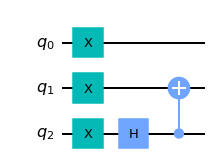

In [7]:
circa = circ_1p2a.compose(circ_1p2b, qubits=[2,1])
circa.draw('mpl')

$\bullet$ **Method 2:** First convert a circuit into a quantum gate using [to_gate](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.to_gate.html) method, then 
[append](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.append.html#qiskit.circuit.QuantumCircuit.append) the gate to another circuit. An example is provided [here](https://www.youtube.com/watch?v=krhPpzkT_z4). Note that the circuits with classical bits cannot be converted to gate. We can alternatively generate the `circa` as:

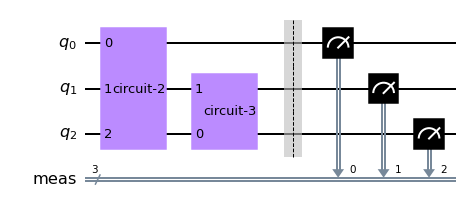

In [8]:
gate_x3 = circ_1p2a.to_gate()
gate_hcx = circ_1p2b.to_gate()
circb = QuantumCircuit(3)
circb.append(gate_x3, [0,1,2])
circb.append(gate_hcx, [2,1])
circb.measure_all()  
circb.draw('mpl')

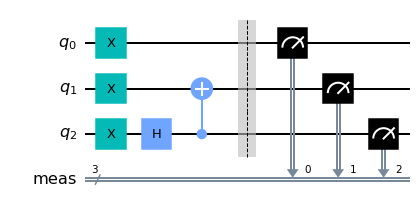

In [9]:
# Check circb and circa have the same construction.
circb.decompose().draw('mpl')

### 1.3 Generating parametrized circuits.

Parametrized quantum circuits is useful in solving variational problems. To construct parameterized circuits and assign values to circuit parameters in Qiskit, we will use Qiskit's [Parameter](https://qiskit.org/documentation/stubs/qiskit.circuit.Parameter.html) and [ParameterVector](https://qiskit.org/documentation/stubs/qiskit.circuit.ParameterVector.html) (construct multiple parameters at once) class.

In [10]:
from qiskit.circuit import Parameter, ParameterVector
import numpy as np

$\bullet$ **Method 1:** use the `Parameter` class. 

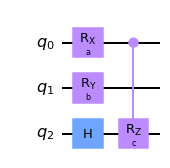

In [11]:
# Define your parameters.
a, b, c = Parameter('a'), Parameter('b'), Parameter('c')
# Define the quantum circuit.
circ_1p3 = QuantumCircuit(3)
circ_1p3.rx(a, 0)         # RX(a) on qubit 0.
circ_1p3.ry(b, 1)         # RY(b) on qubit 1.
circ_1p3.h(2)             # A regular gate no need for parametrization.
circ_1p3.crz(c, 0, 2)     # CRZ(c) controlled on qubit 0, acting on qubit 2.
circ_1p3.draw('mpl')

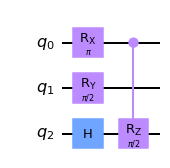

In [12]:
# Assign (bind) the values
circ1p3_bind = circ_1p3.bind_parameters({a: np.pi, b: np.pi/2, c: np.pi/2})
circ1p3_bind.draw('mpl')

$\bullet$ **Method 2:** use the `ParameterVector` class, where you assign all the parameters within a single vector. Therefore, we can generate the same circuit above by:

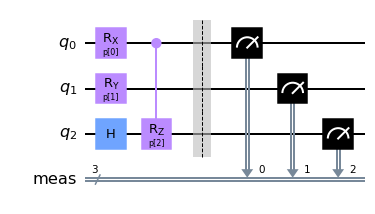

In [13]:
# Define your parameters.
p = ParameterVector('p', 3)  
# Define the quantum circuit.
circ_1p3 = QuantumCircuit(3)
circ_1p3.rx(p[0], 0)         # RX(a) on qubit 0.
circ_1p3.ry(p[1], 1)         # RY(b) on qubit 1.
circ_1p3.h(2)                # A regular gate no need for parametrization.
circ_1p3.crz(p[2], 0, 2)     # CRZ(c) controlled on qubit 0, acting on qubit 2.
circ_1p3.measure_all()       # A side note: measurement will add classical registers in your circuit, if they are not originally in QuantumCircuit. 
circ_1p3.draw('mpl')

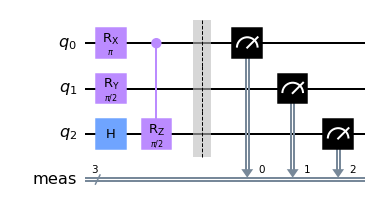

In [14]:
circ1p3_bind = circ_1p3.bind_parameters({p: [np.pi, np.pi/2, np.pi/2]})
circ1p3_bind.draw('mpl')

## Step 2: Run your quantum simulation & Data collection.

Having the quantum circuit(s) ready, we will run our quantum simulation by creating and submitting jobs to the available device. While the jobs are running, we can monitor their status. We are also able to view the jobs we have submitted and are on the waitlist through the dashboard of IBM Quantum account.

### 2.1 Choosing the backend to run your circuit.

A useful package for simulating quantum circuits is called [Qiskit Aer](https://qiskit.org/documentation/tutorials/simulators/1_aer_provider.html), which provides multiple backends for running a quantum simulation. The main simulator backend of the Aer provider is the `AerSimulator` backend, who mimics the execution of an actual quantum computer by default.

In [15]:
from qiskit import Aer, transpile  # You can ignore this if 'from qiskit import *' has been executed.
from qiskit.tools.visualization import plot_histogram, plot_state_city

In [16]:
# List the available backends.
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

Here's a sample code for simulating the quantum circuit above, `circ1p3_bind`, with the `aer_simulator`. We generate the simulation result using the built-in visualization tool `plot_histogram`, which converts counts (a dictionary of results) into a histogram, where the probabilities of measuring each state is shown on the vertical axis.

{'111': 256, '101': 253, '011': 247, '001': 268}


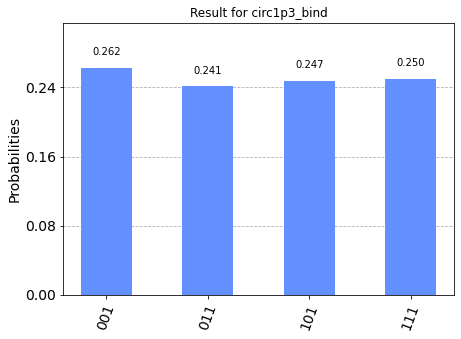

In [17]:
# Let's see the results! 
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ1p3_bind, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)    
plot_histogram(counts, title='Result for circ1p3_bind')

### 2.2 Monitor the status of your experiment and check your submitted jobs.  

Using Qiskit, we can also send jobs to IBM Quantum computers, and [monitor their status](https://www.youtube.com/watch?v=ozy0b7eE-lo). An overview of how to use your IBM Quantum account to access the systems and simulators available in IBM Quantum is available [here](https://quantum-computing.ibm.com/lab/docs/iql/manage/account/ibmq).

In [18]:
from qiskit.tools import job_monitor

In [19]:
# Submit your job to a quantum computer 'ibmq_belem'.
# Select provider and backend.
provider = IBMQ.get_provider(hub='ibm-q') 
backend = provider.get_backend('ibmq_belem') 
# Run the circuit 'circ1p3_bind' and execute the job.
job = execute(circ1p3_bind, backend)
# Monitor the job.
job_monitor(job)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

IBMQProviderError: 'No provider matches the specified criteria: hub = ibm-q, group = None, project = None'

Once the job have been submitted to a quantum computer, you will be able to check and see the it appears on the  pending list on your IBM Quantum dashboard:

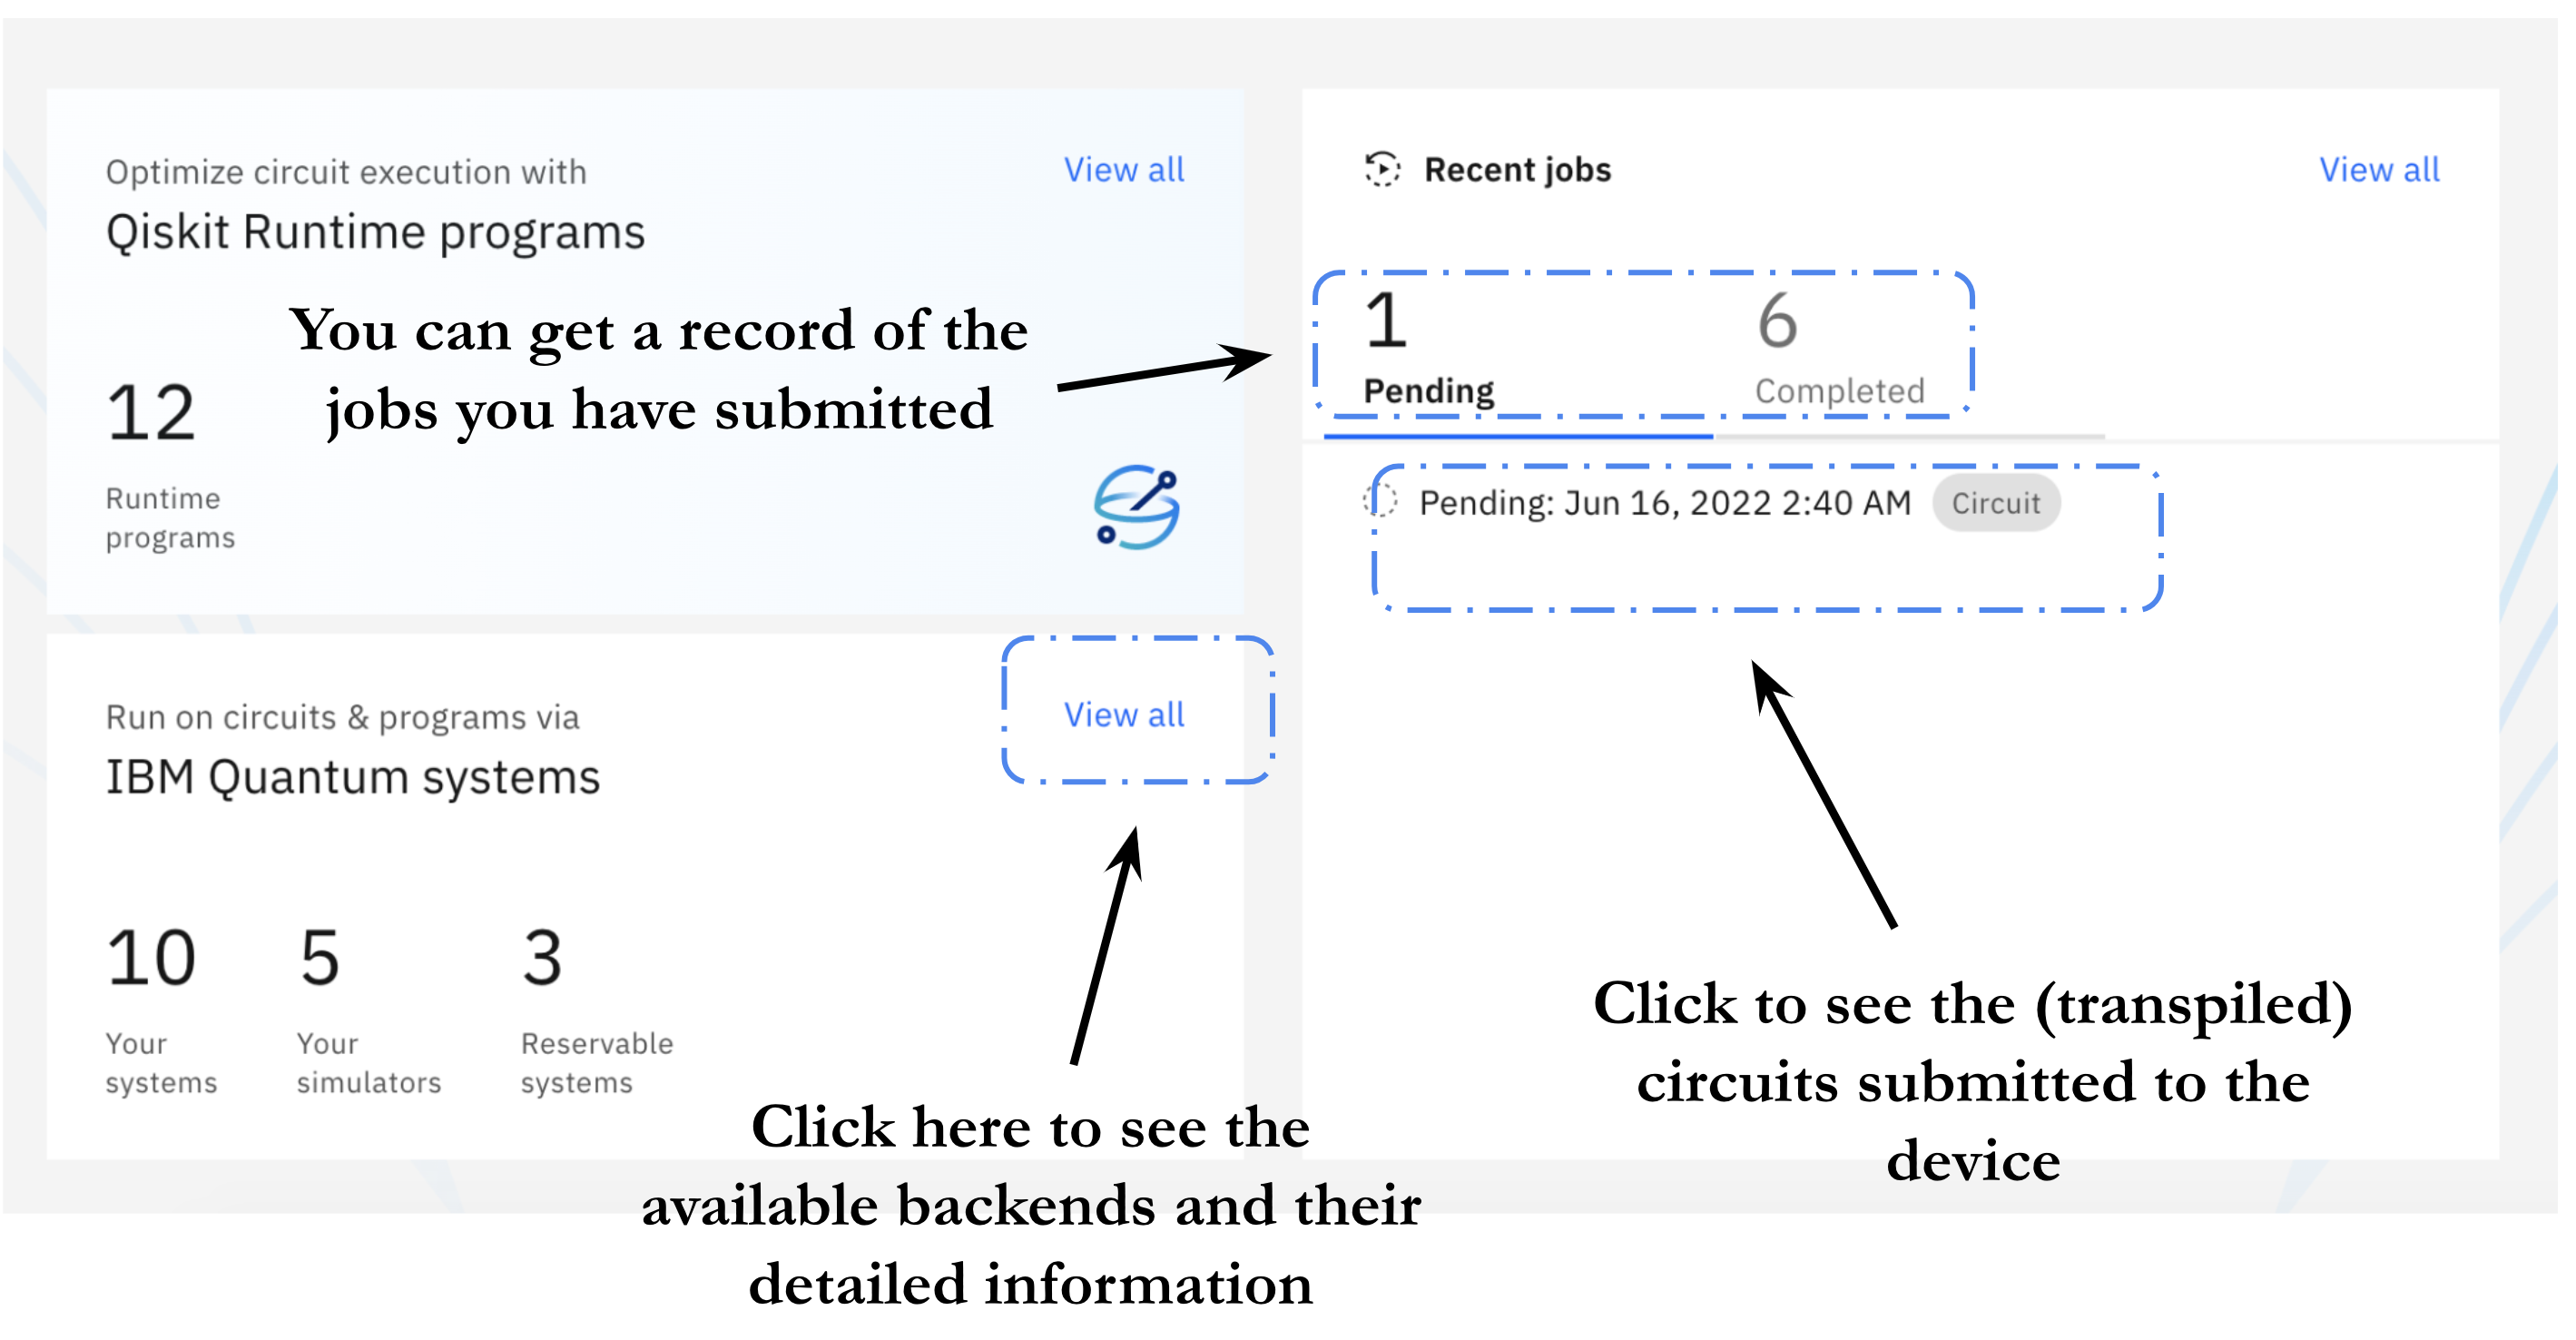

### 2.3 Submit multiple quantum circuits to a backend.

If there are multiple circuits to be submitted, you can [bundle the circuits in a single job](https://www.youtube.com/watch?v=xUt4YKQEUco) to reduce the queue times. For example, if we want to the cirucit `circ1p3_bind` and `circb` together on a simulator, we can do:

In [20]:
simulator = Aer.get_backend('qasm_simulator')
qc_list = [circ1p3_bind, circb]       # Include all the circuits in a single list.
job = execute(qc_list, simulator)
job.result().get_counts()

[{'001': 236, '111': 254, '101': 275, '011': 259}, {'011': 513, '101': 511}]

## Some visualization tools

$\bullet$ If you want to visualize a quantum circuit in a LaTex document, Qiskit offers the [LaTex drawer](https://www.youtube.com/watch?v=Q_pkenZ05eM) which generates the code you can copy and paste into a LaTex document. Another useful package for graphing quantum circuit in Latex is called [Quantikz](http://mirrors.ibiblio.org/CTAN/graphics/pgf/contrib/quantikz/quantikz.pdf).
\
$\bullet$ [Kaleidoscope](https://nonhermitian.org/kaleido/tutorials/interactive/bloch_sphere.html) provides an option to visualize the quantum states on on Bloch sphere. You can generate the plot a Jupyter notebook.